<a href="https://colab.research.google.com/github/giuliovv/ANNDL_competition_1/blob/master/toma_models/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

colab = "True" #@param ['True','False']
if colab == "True":
  from google.colab import drive
  drive.mount('/gdrive')
  %cd /gdrive/MyDrive/Colab Notebooks/
  if not os.path.isdir('training'):
    !unzip dataset.zip

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Colab Notebooks


In [2]:
%ls

'1) FeedForwardNeuralNetwork.ipynb'
'4) Data Loader & Data Augmentation - Tensorboard (Skeleton).ipynb'
'4) Transfer Learning & Fine Tuning.ipynb'
 duckie_baseline3_torch2.ipynb
 duckie_baseline3_torch.ipynb
'Duckietown models'/
 models/
 picture.jpg
'PPO_duckie_baseline3_drive_clean (1).ipynb'
 PPO_duckie_baseline3_drive_clean.ipynb
 PPO_duckie_baseline3_multiple_maps_drive.ipynb
 PPO_duckie_baseline3_multiple_maps.ipynb
'Tensorboard (1).ipynb'
 Tensorboard.ipynb
 test/
 training/
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb
 Untitled7.ipynb
 Untitled8.ipynb
 Untitled9.ipynb
 winequality.csv
 y.npy


In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
dataset_dir = 'training'

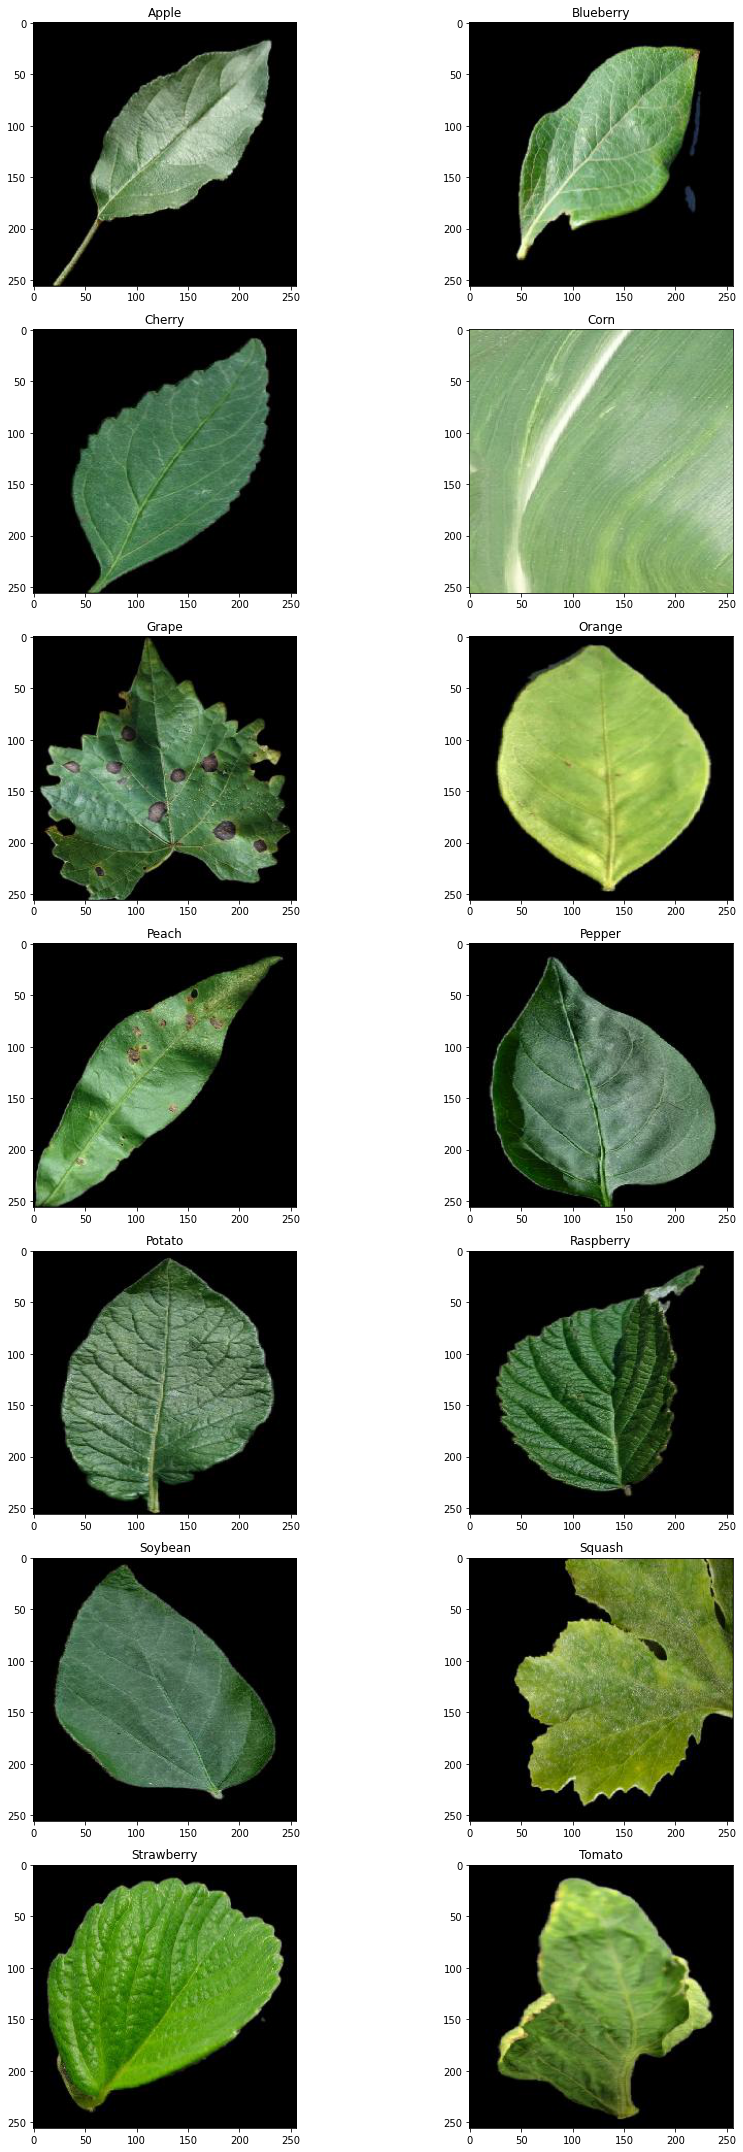

In [4]:
# Plot example images from dataset
labels = ['Apple','Blueberry','Cherry','Corn','Grape','Orange','Peach','Pepper','Potato','Raspberry','Soybean','Squash','Strawberry','Tomato']

num_row = len(labels)//2
num_col = len(labels)//num_row
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_row,15*num_col))
for i in range(len(labels)):
  if i < len(labels):
    class_imgs = next(os.walk('{}/{}/'.format(dataset_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/{}/{}'.format(dataset_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

Let the game begin

In [7]:
import tensorflow as tf

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
labels

['Apple',
 'Blueberry',
 'Cherry',
 'Corn',
 'Grape',
 'Orange',
 'Peach',
 'Pepper',
 'Potato',
 'Raspberry',
 'Soybean',
 'Squash',
 'Strawberry',
 'Tomato']

In [5]:
## if I train with loaded numpy arrays
train_with_np_array = False
## if I train with images loaded from a directory
train_from_dir = True
split_data_from_dir = False

if train_with_np_array:
  # I forgot to convert to RGB but no errors where thown so maybe it's already RGB?
  if not "X.npy" in os.listdir():
    import cv2
    X_data = []
    y_data = []
    for i, label in enumerate(labels):
      print(label)
      for pic in os.listdir("training/"+label):
        img = np.array(Image.open('{}/{}/{}'.format(dataset_dir, label, pic)))
        # There are 2 samples with double resolution
        if img.shape != (256, 256, 3):
          # There is one sample entirely black
          if img.shape == (256, 256):
            continue 
          img = cv2.resize(img, (256, 256))
        X_data.append(img)
        y_data.append(y[i])
    print("Ok, saving...")
    X = np.array(X_data)
    y = np.array(y_data)
    with open("X.npy", "wb") as f:
      np.save(f, X)
    with open("y.npy", "wb") as f:
      np.save(f, y)
  else:
    print("Loading X...")
    X = np.load("X.npy", allow_pickle=True)
    print("Loading y...")
    y = np.load("y.npy", allow_pickle=True)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

if train_from_dir:
  import shutil
  if not "test" in os.listdir() or split_data_from_dir:
    print("No test directory!")
    for label in labels:
      print(label)
      image_names = [pic for pic in os.listdir("training/"+label)]
      train_images, test_images = train_test_split(image_names, test_size=0.05)
      if not 'test/'+label in os.listdir():
        try:
          os.makedirs(os.path.abspath(os.getcwd())+'/test/'+label+'/')
        except OSError:
          print("Failed to create a dir for ", '/test/'+label+'/')
        else:
          print("Success creating folder ", label)
      for name in test_images:
        shutil.move(os.path.abspath(os.getcwd())+'/training/'+label+'/'+name, os.path.abspath(os.getcwd())+'/test/'+label+'/'+name)
    print("Transfered all testing data!")
  else:
      print("Data all ready!")

Data all ready!


In [13]:
tf.keras.applications.vgg16.preprocess_input
labels
%ls

'1) FeedForwardNeuralNetwork.ipynb'
'4) Data Loader & Data Augmentation - Tensorboard (Skeleton).ipynb'
 duckie_baseline3_torch2.ipynb
 duckie_baseline3_torch.ipynb
'Duckietown models'/
 picture.jpg
'PPO_duckie_baseline3_drive_clean (1).ipynb'
 PPO_duckie_baseline3_drive_clean.ipynb
 PPO_duckie_baseline3_multiple_maps_drive.ipynb
 PPO_duckie_baseline3_multiple_maps.ipynb
'Tensorboard (1).ipynb'
 Tensorboard.ipynb
 test/
 training/
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb
 Untitled7.ipynb
 Untitled8.ipynb
 Untitled9.ipynb
 winequality.csv
 y.npy


In [6]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
## couldn't import preprocess_input, but it looks like it's already imported with tf
##from tensorflow.keras.applications import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential, optimizers

In [7]:
BATCH_SIZE = 128
VALIDATE_BATCH_SIZE = BATCH_SIZE

if train_with_np_array:
  train_generator = ImageDataGenerator(
  ## when rotating some pixels remain unfilled, to fill them the default function is to take the "nearest pixel color", this maybe screws up the learning process so I left it for later training
  ##                                     rotation_range=90,
                                     width_shift_range=0.1, 
                                     height_shift_range=0.1,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     preprocessing_function=tf.keras.applications.vgg16.preprocess_input) # VGG16 preprocessing
  test_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

  train_data_flow = train_generator.flow(X_train, y_train,
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True,
                                          seed=42)
  validate_data_flow = train_generator.flow(X_val, y_val,
                                          batch_size=VALIDATE_BATCH_SIZE, 
                                          shuffle=True,
                                          seed=42)
  test_data_flow = test.generator.flor(X_test, y_test,
                                          batch_size=1,
                                          shuffle=False,
                                          seed=42)
  
elif train_from_dir:
  train_generator = ImageDataGenerator(
  ## when rotating some pixels remain unfilled, to fill them the default function is to take the "nearest pixel color", this maybe screws up the learning process so I left it for later training
                                     rotation_range=10,
                                     width_shift_range=0.2, 
                                     height_shift_range=0.2,
                                     brightness_range=[0.7, 1.3],
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     validation_split=0.2,
                                     preprocessing_function=tf.keras.applications.vgg16.preprocess_input) # VGG16 preprocessing
  test_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

  traingen = train_generator.flow_from_directory('training',
                                               target_size=(256, 256),
                                               class_mode='categorical',
                                               classes=labels,
                                               color_mode='rgb',
                                               subset='training',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

  validgen = train_generator.flow_from_directory('training',
                                                target_size=(256, 256),
                                                class_mode='categorical',
                                                classes=labels,
                                                color_mode='rgb',
                                                subset='validation',
                                                batch_size=VALIDATE_BATCH_SIZE,
                                                shuffle=True,
                                                seed=42)

  testgen = test_generator.flow_from_directory('test',
                                              target_size=(256, 256),
                                              class_mode='categorical',
                                              classes=labels,
                                              color_mode='rgb',
                                              batch_size=1,
                                              shuffle=False,
                                              seed=42)

Found 13472 images belonging to 14 classes.
Found 3363 images belonging to 14 classes.
Found 893 images belonging to 14 classes.


In [8]:
# function to create the whole model, including the pre-trained layer and the fully connected layers
# the default shape for vgg16 is (224,224,3) ours is (256,256,3) so we have to set it when calling the function
def create_model(n_classes, optimizer, input_shape=(224,224,3)):

  # create the pre-trained layer
  vgg = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
  
  ## make all the conv layers non-trainable
  for layer in vgg.layers:
    layer.trainable = False

  ## building the network layer by layer
  ## I added two dense and one dropout layer to create the fully connected part (we can play with the number of neurons in each layer)
  vgg_output = vgg.output
  flatten = Flatten(name="flatten")(vgg_output)
  dense1 = Dense(64, activation='relu')(flatten)
  dense2 = Dense(32, activation='relu')(dense1)
  dropout = Dropout(0.2)(dense2)
  output_layer = Dense(n_classes, activation='softmax')(dense2)
  
  model = Model(inputs=vgg.input, outputs=output_layer)

  model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  
  return model

In [9]:
# create the model
input_shape = (256,256,3)
n_classes = len(labels)
adam_optimizer = optimizers.Adam(learning_rate=0.001)

model = create_model(n_classes, adam_optimizer, input_shape=input_shape)

# if we want we can add early stopping and model checkpoint to save the best weights of the model

In [1]:
# train the model on the new data

n_steps = traingen.samples / BATCH_SIZE
n_val_steps = validgen.samples / VALIDATE_BATCH_SIZE
n_epochs = 10

history = model.fit(traingen,
                    epochs=n_epochs,
                    validation_data=validgen,
                    steps_per_epoch=n_steps,
                    validation_steps=n_val_steps,
                    verbose=1)

NameError: ignored

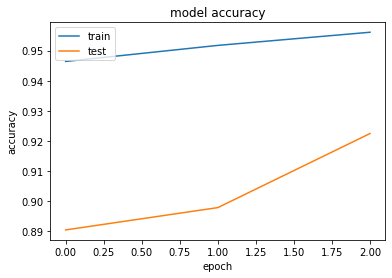

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
model.save(os.path.abspath(os.getcwd())+'/models/model1_20')

INFO:tensorflow:Assets written to: /gdrive/My Drive/Colab Notebooks/models/model1_20/assets


In [17]:
#true_classes = testgen.classes
#class_indices = traingen.class_indices
#class_indices = dict((v,k) for k,v in class_indices.items())
count = 0
count2 = 0
count3 = 0
correct = 0
correct2 = 0
correct3 = 0

for i, label in enumerate(labels):
      print(label)
      for pic in os.listdir("test/"+label):
        my_image = np.array(Image.open('{}/{}/{}'.format('test', label, pic)).convert('RGB'))
        my_image = tf.expand_dims(my_image, 0)
        #my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
        #my_image = tf.convert_to_tensor(my_image)
        my_image1 = tf.keras.applications.vgg16.preprocess_input(my_image)
        #print(my_image.shape)
        #print(check.predict(my_image.numpy()).numpy()[0], i)
        if check.predict(my_image1).numpy()[0]==i:
          correct+=1
        count +=1
        my_image2 = tf.keras.applications.vgg16.preprocess_input(my_image.numpy())
        #print(my_image.shape)
        #print(check.predict(my_image.numpy()).numpy()[0], i)
        if check.predict(my_image2).numpy()[0]==i:
          correct2+=1
        count2 +=1
        my_image3 = my_image.numpy()
        #print(my_image.shape)
        #print(check.predict(my_image.numpy()).numpy()[0], i)
        if check.predict(my_image3).numpy()[0]==i:
          correct3+=1
        count3 +=1

print("Accuracy: ", correct/count)
print(correct2/count2)
print(correct3/count3)


#vgg_preds = model.predict(testgen)
#vgg_pred_classes = np.argmax(vgg_preds, axis=1)

#from sklearn.metrics import accuracy_score

#vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
#print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

Apple
Blueberry
Cherry
Corn
Grape
Orange
Peach
Pepper
Potato
Raspberry
Soybean
Squash
Strawberry
Tomato
Accuracy:  0.13997760358342665
0.9742441209406495
0.8499440089585666


In [14]:
model = tf.keras.models.load_model(os.path.abspath(os.getcwd())+'/models/model1_20')

[[  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  2   2   2]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  4   4   4]
 [  9   9   9]
 [ 12  12  12]
 [ 48  51  40]
 [118 125 107]
 [121 134 104]
 [121 140  95]
 [ 94 122  63]
 [ 95 131  59]
 [103 146  66]
 [ 92 142  57]
 [ 84 138  54]
 [ 83 138  57]
 [ 80 134  58]
 [ 78 132  57]
 [ 80 133  61]
 [ 84 138  63]
 [ 82 134  60]
 [ 75 127  52]
 [ 65 115  56]
 [ 68 118  59]
 [ 67 117  58]
 [ 67 117  58]
 [ 73 123  64]
 [ 80 130  71]
 [ 77 127  68]
 [ 68 118  59]
 [ 65 115  56]
 [ 68 118  59]
 [ 73 123  64]
 [ 75 125  66]
 [ 73 123  64]
 [ 69 119  60]
 [ 66 116  57]
 [ 65 115  56]
 [ 67 117  58]
 [ 64 114  55]
 [ 60 110  51]
 [ 61 111  52]
 [ 64 113  57]
 [ 65 114  58]
 [ 64 113  57]
 [ 61 110  55]
 [ 60 109  54]
 [ 62 111  56]
 [ 63 112  57]
 [ 63 111  59]
 [ 60 108  56]
 [ 57 105  53]
 [ 56 104  52]
 [ 56 104  52]
 [ 52 101  45]
 [ 51 100  44]
 [ 48  97 

<Figure size 432x288 with 0 Axes>

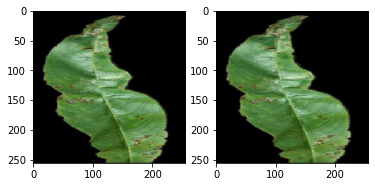

In [59]:
import PIL
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

#load the image
#my_image1 = load_img(os.path.abspath(os.getcwd())+'/test/Peach/31936.jpg', target_size=(256, 256))
my_image = PIL.Image.open(os.path.abspath(os.getcwd())+'/test/Peach/31936.jpg').convert('RGB')
my_image1 = PIL.Image.open(os.path.abspath(os.getcwd())+'/test/Peach/31936.jpg')
plt.figure()
_, f = plt.subplots(1,2)
f[0].imshow(np.array(my_image1))
f[1].imshow(np.array(my_image))

#preprocess the image
my_image1 = np.array(my_image1)
print(my_image1[100])
#my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
print(np.array(my_image).shape)
#my_image = preprocess_input(my_image)
print(np.array(my_image1).shape)
#my_image = tf.convert_to_tensor(my_image)
#print(my_image)

#make the prediction
#prediction = model.predict(my_image)

In [82]:
testgen.next()

(array([[[[-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ],
          ...,
          [-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ]],
 
         [[-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ],
          ...,
          [-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ]],
 
         [[-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ],
          ...,
          [-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ]],
 
         ...,
 
         [[-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ],
          [-103.939, -116.779, -123.68 ],
          ...,
          [-103.939, -116.779, -1

In [35]:
import numpy as np
[np.round(x) for x in prediction]
np.argmax(prediction, axis=-1).shape

6

In [31]:
print("The model predicted this is a "+labels[np.argmax(prediction)]+" leaf.")

AttributeError: ignored

In [15]:
import os
import tensorflow as tf

class Model:
    def __init__(self, path):
        self.model = tf.keras.models.load_model(path)
        return

    def predict(self, X):
        prediction = self.model.predict(X)
        return tf.argmax(prediction, axis=-1)

In [16]:
check = Model(os.path.abspath(os.getcwd())+'/models/model1_20')

In [24]:
from keras.preprocessing.image import load_img, img_to_array

my_image = Image.open(os.path.abspath(os.getcwd())+'/test/Peach/31936.jpg').convert('RGB')
#my_image = load_img(os.path.abspath(os.getcwd())+'/test/Peach/31936.jpg', target_size=(256, 256))
my_image = np.array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
#print(my_image)
my_image = tf.convert_to_tensor(my_image)
#print(my_image)
my_image = tf.keras.applications.vgg16.preprocess_input(my_image)
print(my_image)

print(check.predict(my_image).numpy()[0])

tf.Tensor(
[[[[153 140 133]
   [153 140 133]
   [153 140 133]
   ...
   [153 140 133]
   [153 140 133]
   [153 140 133]]

  [[153 140 133]
   [153 140 133]
   [153 140 133]
   ...
   [153 140 133]
   [153 140 133]
   [153 140 133]]

  [[153 140 133]
   [153 140 133]
   [153 140 133]
   ...
   [153 140 133]
   [153 140 133]
   [153 140 133]]

  ...

  [[153 140 133]
   [153 140 133]
   [153 140 133]
   ...
   [153 140 133]
   [153 140 133]
   [153 140 133]]

  [[153 140 133]
   [153 140 133]
   [153 140 133]
   ...
   [153 140 133]
   [153 140 133]
   [153 140 133]]

  [[153 140 133]
   [153 140 133]
   [153 140 133]
   ...
   [153 140 133]
   [153 140 133]
   [153 140 133]]]], shape=(1, 256, 256, 3), dtype=uint8)
13


In [61]:
import shutil
##shutil.copytree(os.path.abspath(os.getcwd())+'gdrive/MyDrive/Colab Notebooks/models/model1_20', os.path.abspath(os.getcwd())+'content/SubmissionModel/')

%ls
os.path.abspath(os.getcwd())

'1) FeedForwardNeuralNetwork.ipynb'
'4) Data Loader & Data Augmentation - Tensorboard (Skeleton).ipynb'
 duckie_baseline3_torch2.ipynb
 duckie_baseline3_torch.ipynb
'Duckietown models'/
 models/
 picture.jpg
'PPO_duckie_baseline3_drive_clean (1).ipynb'
 PPO_duckie_baseline3_drive_clean.ipynb
 PPO_duckie_baseline3_multiple_maps_drive.ipynb
 PPO_duckie_baseline3_multiple_maps.ipynb
'Tensorboard (1).ipynb'
 Tensorboard.ipynb
 test/
 training/
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb
 Untitled7.ipynb
 Untitled8.ipynb
 Untitled9.ipynb
 winequality.csv
 y.npy


'/gdrive/My Drive/Colab Notebooks'

In [65]:
im= [testgen.next() for i in range(10)]
print([i[1] for i in im])
print([check.predict(tf.expand_dims(i[0][0], 0)) for i in im])

[array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)]
[<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>, <tf.Te